In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ursse.phase_space_trajectory as pst
try:
    import ursse_cpp.sync_motion_sim as sm
    cpp_loaded = True
except:    
    cpp_loaded = False
    print("Warning: Couldn't load sync_motion_cpp module")
from config_ursse import get_from_config, save_to_config, get_path_from_config
from ursse.path_assistant import PathAssistant
import os
import valstore as vt
images_dir = os.path.join(get_path_from_config("URSSE_sync_motion_note_dir"),
                          "images")
shift = PathAssistant('shift_02_28_2020')
np_rand_seed = 1
iota_revolution_period = get_from_config("IOTA_revolution_period")

## Remeber for repeatable resuts you need to set numpy random seed

In [2]:
gamma = get_from_config("gamma")
alpha = get_from_config("ring_alpha")
V = get_from_config("Vrf")
f = 1/get_from_config("IOTA_revolution_period")
h = get_from_config("RF_q")
c = get_from_config("c_m/s")
rho= get_from_config("dipole_rho_m")
D = alpha*(1/f*c/2/np.pi)/rho
JE = 2 + D
vt.newval("demoJE", JE, "{:.2f}", "")

In [3]:
hbar_c = 0.1973269804e-6
gamma_to_nav = 0.0661969
Ec = 3 / 2 * hbar_c * pow(gamma, 3) / rho
nav = gamma_to_nav*gamma
vt.newval("nav", nav, "{:.1f}", "")
vt.newval("Ec", Ec, "{:.1f}", "eV")

In [4]:
nav

12.48802575342958

# Textbook results for  rms bunch length

In [5]:
E0 = gamma*511000
v0 = V/E0
eta = alpha - 1/gamma**2
w = 2*np.pi*h*eta
delta_rms = 0.62e-6*gamma/np.sqrt(JE*rho)
print("delta rms = ", delta_rms)
tau_rms = 1e9*delta_rms/((f*h)*2*np.pi*np.sqrt(V/(2*np.pi*E0*h*np.abs(eta))))
print("tau_rms = ", tau_rms, "ns")

delta rms =  8.597426389751137e-05
tau_rms =  0.30651267688936373 ns


In [6]:
Et = 8/9*np.pi*1/137*gamma*Ec
Et

10.91643937761682

In [7]:
alpha_E = Et/2/E0/iota_revolution_period*JE
1/alpha_E

0.8906438729123504

# Energy per turn distribution

In [8]:
# nrev = 100000
# np.random.seed(np_rand_seed)
# nphs = np.random.poisson(lam=nav, size=nrev)
# ens = np.zeros(nrev)
# for i,nph in enumerate(nphs):
#     ens[i] = sum([sm.InvSynchFractInt(r) for r in np.random.rand(nph)])*Ec
# plt.hist(ens, bins=50, density=True)
# plt.xlabel("Emitted energy at one turn, eV")
# print("Number of emitted photons is obtained from Poisson distribution,"
#      " then the energy of each photon is obtained from InvSynchFractInt,"
#      " then their sum is calculated")
# plt.show()

# Comparison of Gamma distribution with the simulated one

In [9]:
# shape, scale = k, theta  # mean=4, std=2*sqrt(2)
# nrolls = 100000
# np.random.seed(np_rand_seed)
# s = np.random.gamma(shape, scale, nrolls)
# import scipy.special as sps 
# fig, ax = plt.subplots()
# count, bins, ignored = ax.hist(ens, bins=50, density=True,
#         label=f'Histogram for {nrolls} simulated values of ' + r'$U$')
# y = bins**(shape-1)*(np.exp(-bins/scale) /  
#                      (sps.gamma(shape)*scale**shape))
# ax.plot(bins, y, linewidth=2, color='r', label='Fit by Gamma distribution')  
# # plt.hist(sm.RandomEnergyGammaDistribution(k, theta, nrolls, 42),
# #          bins=50, density=True,
# #          label='From C++ - random variable with Gamma distribution')
# ax.set_xlabel(r"Emitted energy at one turn $U$ (eV)")
# handles, labels = ax.get_legend_handles_labels()
# order = [1,0]
# ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
# fig.savefig(os.path.join(images_dir,
#                              "energy_per_turn_distribution.png"),
#             dpi=300, bbox_inches='tight')
# plt.show()

# Distribution for a single emitted photon

In [10]:
# rands = np.random.rand(1000000)
# en = np.zeros(shape=rands.shape)
# Et = 8/9*np.pi*1/137*gamma*Ec
# Scale = 15*np.sqrt(3)/8*Et
# for i,r in enumerate(rands):
#     en[i] = sm.InvSynchFractInt(r)*Ec
# plt.hist(en, bins=100, range=(0,2.0),density=True)
# plt.xlabel(r"Energy carried away with one photon $u$ (eV)")
# plt.savefig(os.path.join(images_dir,
#                              "one_photon_energy_density_function.png"),
#             dpi=300, bbox_inches='tight')
# plt.show()

In [11]:
if cpp_loaded:
    import scipy.special as sps
    from ursse.path_assistant import get_plot_style_sheet
    plt.style.use(get_plot_style_sheet("jinst"))
    subtitlepos = 0.95, 0.55
    fig, axs = plt.subplots(1,2,figsize=(15,3.5))
    ax0, ax1 = axs

    np.random.seed(np_rand_seed)

    rands = np.random.rand(1000000)
    en = np.zeros(shape=rands.shape)
    Et = 8/9*np.pi*1/137*gamma*Ec
    Scale = 15*np.sqrt(3)/8*Et
    for i,r in enumerate(rands):
        en[i] = sm.InvSynchFractInt(r)*Ec

    ax0.hist(en, bins=100, range=(0,2.0),density=True)
    ax0.set_xlabel(r"Energy carried away with one photon $u$ (eV)")
    ax0.set_ylabel("Probability density")


    nrev = 100000

    nphs = np.random.poisson(lam=nav, size=nrev)
    ens = np.zeros(nrev)
    for i,nph in enumerate(nphs):
        ens[i] = sum([sm.InvSynchFractInt(r) for r in np.random.rand(nph)])*Ec

    Eav = np.mean(ens)
    Estd = np.std(ens)
    M = 1/(Estd/Eav)**2
    k = M
    theta = Eav/M
    shape, scale = k, theta

    count, bins, ignored = ax1.hist(ens, bins=50, density=True,
            label=f'Histogram for {nrev} simulated values of ' + r'$U$')
    y = bins**(shape-1)*(np.exp(-bins/scale) /  
                         (sps.gamma(shape)*scale**shape))
    ax1.plot(bins, y, linewidth=2, color='r', label='Fit by a Gamma distribution')  
    ax1.set_xlabel(r"Emitted energy at one turn $U$ (eV)")
    ax1.set_ylabel("Probability density")
    handles, labels = ax1.get_legend_handles_labels()
    order = [1,0]
    ax1.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

    for ax, lab in zip(axs, ["(a)", "(b)"]):
        ax.text(-0.15, 1.05, lab, transform=ax.transAxes, va='top', ha='left',
               fontsize=24)

    plt.savefig(os.path.join(images_dir,
                                 "radiation_energy_distribution.png"),
                dpi=300, bbox_inches='tight')

    plt.show()
    
    vt.newval("Uav", Et, "{:.1f}", "eV")
    save_to_config("Et", Et)
    phis = np.arcsin(Et/V)
    vt.newval("phis", phis, "{:.4f}", "rad")
    vt.newval("M", M, "{:.2f}", "")
    save_to_config("M", M)

# Simulation for 60 seconds

In [12]:
meas_df = pst.get_revolution_delay_df_one_gate(
    'shift_02_28_2020', '1el_002.ptu')

In [13]:
# %%time
# sim_df = sm.get_simulated_revolution_delay_data(
#     gamma, alpha, V, f, h, JE, k, theta,
#     meas_df['revolution'],
#     tau0=tau_rms, delta0=0, rand_seed_int=3, rf_noise_std=7e-5)
# sim_df.to_pickle(shift.get_results_dir().fi("sim_df.pkl"))

In [14]:
sim_df = pd.read_pickle(shift.get_results_dir().fi("sim_df.pkl"))

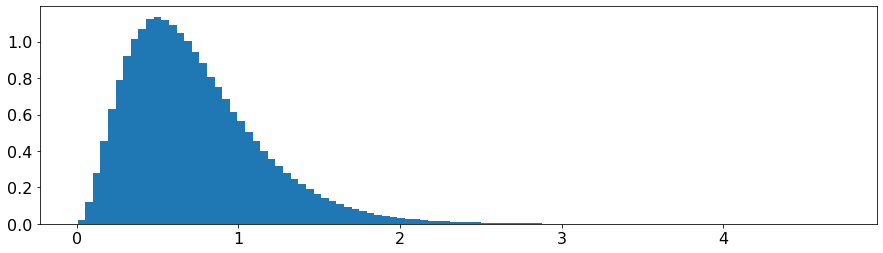

In [15]:
# adding random gamma to sim_df to simulate spad's tts
spad_tts = 0.41
vt.newval("demospadtts", spad_tts, "{:.2f}", "ns")
vt.newval("SpadTts", 0.35, "{:.2f}", "ns")
mean_spad = 0.73
vt.newval("demospadmean", mean_spad, "{:.1f}", "ns")
std_spad = spad_tts
theta_spad = std_spad**2/mean_spad
k_spad = mean_spad/theta_spad
ts_spad = np.random.gamma(k_spad, theta_spad, size=len(sim_df.index))
fig, ax = plt.subplots(figsize=(15,4))
ax.hist(ts_spad, bins=100, density=True)
plt.show()
sim_df['delay'] = sim_df['delay'] + ts_spad

In [16]:
print(f"Simulation rms bunch length = {sim_df.delay.std():.3f} ns")
print(f"Textbook equation rms bunch length = {tau_rms:.3f} ns")

Simulation rms bunch length = 0.663 ns
Textbook equation rms bunch length = 0.307 ns


# Comparison of simulation and measurement

In [17]:
dt = 0.1
vt.newval("dtdemo", dt, "{:.1f}", "sec")

In [18]:
sim_T0 = pst.get_initial_sync_period_estimate(sim_df)
sim_phase_df, sim_fits_df = pst.get_phase_df_from_revoluton_delay_df(sim_df, sim_T0)
sim_sz_df = pst.get_sz_df(sim_df, spad_tts_ns=0, dt=dt)
sim_polar_df = pst.get_polar_df(sim_phase_df, sim_sz_df)

In [19]:
meas_T0 = pst.get_initial_sync_period_estimate(meas_df)
meas_phase_df, meas_fits_df = pst.get_phase_df_from_revoluton_delay_df(meas_df, meas_T0)
meas_sz_df = pst.get_sz_df(meas_df, spad_tts_ns=0, dt=dt)
meas_polar_df = pst.get_polar_df(meas_phase_df, meas_sz_df)

In [20]:
from matplotlib import cm
colormap = cm.get_cmap("plasma")
purple = colormap(6/14)

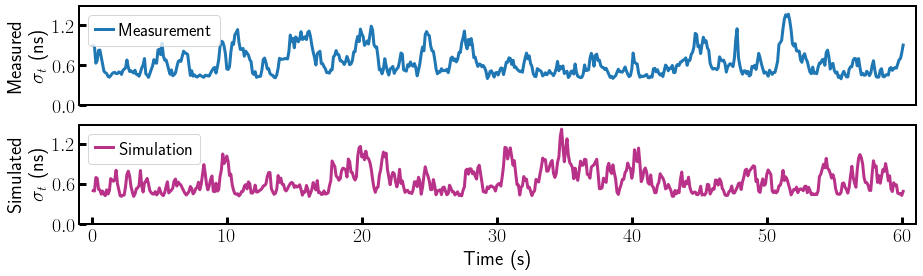

In [21]:
from ursse.path_assistant import get_plot_style_sheet
plt.style.use(get_plot_style_sheet("jinst"))
fig, ax = plt.subplots(2, figsize=(15,4))
ax[0].plot(meas_sz_df['time_sec'], meas_sz_df['sz_ns'], label="Measurement")
ax[0].set_ylim(0,1.05*ax[0].get_ylim()[1])
ax[0].set_ylabel("Measured\n $\sigma_t$ (ns)")
ax[0].set_xticks([])
ax[1].set_xlabel("Time (s)")
ax[1].plot(sim_sz_df['time_sec'], sim_sz_df['sz_ns'], color=purple, label='Simulation')
ax[1].set_ylim(0,ax[1].get_ylim()[1])
ax[1].set_ylabel("Simulated\n $\sigma_t$ (ns)")
ax[1].set_ylim(ax[0].get_ylim())
for a in ax:
    a.set_yticks([0,0.6,1.2])
    a.set_xlim(-1,61)
    a.legend()
# ax[0].set_title("RMS longitudinal electron position in a 0.1 sec time window"
#                 " as a funciton of time")
fig.savefig(os.path.join(images_dir,
                             "comparison_of_rms_vs_time.png"),
            dpi=300, bbox_inches='tight')
plt.show()

In [21]:
np.sqrt(meas_df.delay.std()**2-spad_tts**2)

0.557154974838618

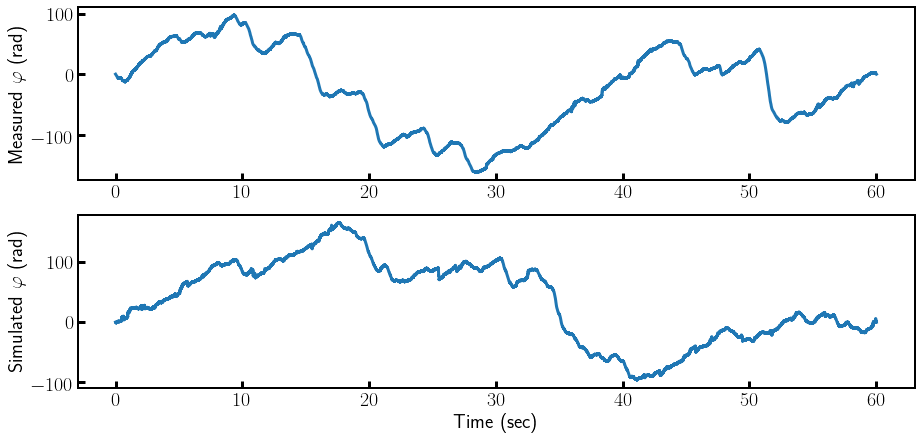

In [22]:
fig, ax = plt.subplots(2, figsize=(15,7))
ax[0].plot(meas_phase_df['time_sec'], meas_phase_df['phase_rad'])
ax[0].set_ylabel(r"Measured $\varphi$ (rad)")
ax[1].set_xlabel("Time (sec)")
ax[1].plot(sim_phase_df['time_sec'], sim_phase_df['phase_rad'])
ax[1].set_ylabel(r"Simulated $\varphi$ (rad)")
# ax[0].set_title("Slow component of the electron phase as a funciton of time")
fig.savefig(os.path.join(images_dir,
                             "comparison_of_phase_vs_time.png"),
            dpi=300, bbox_inches='tight')
plt.show()

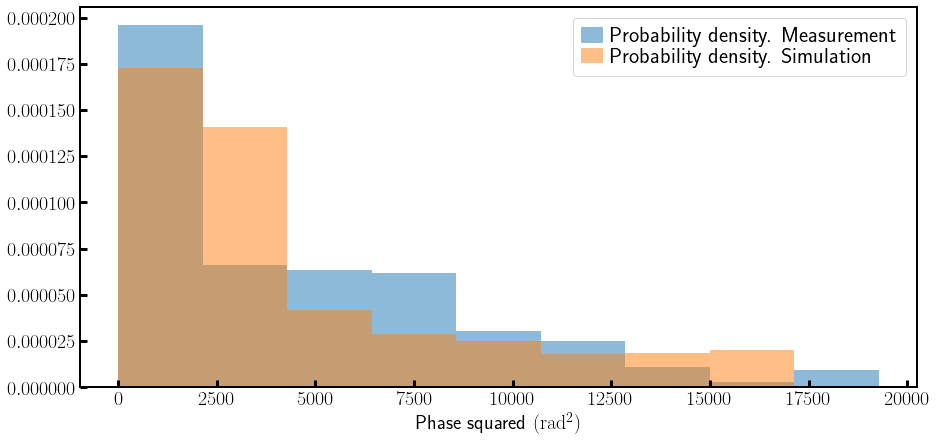

In [23]:
plt.rcParams["text.usetex"] =True
plt.rc('text.latex', preamble=\
       r'\usepackage{siunitx}'
      +r'\newcommand{\e}{\epsilon}')
plt.rcParams.update({'figure.figsize':(30,8),
                     'font.size': 22,
                     'legend.fontsize':22,
                     'errorbar.capsize':3})
nbins = 10
amps_tuple = [(df['phase_rad'].values-df['phase_rad'].mean())**2 for df in (meas_phase_df, sim_phase_df)]
all_amps = np.concatenate(amps_tuple)
l = np.min(all_amps)
r = np.max(all_amps)
bins = np.linspace(l, r, nbins)
bin_centers = (bins[1:]+bins[:-1])/2
kick_hists = [np.histogram(amps, bins=bins)[0] 
                  for amps in amps_tuple]
fig, ax = plt.subplots(figsize=(15,7))
ax.hist(bin_centers, weights=kick_hists[0], bins=bins, density=True,
            alpha=0.5, label="Probability density. Measurement")
ax.hist(bin_centers, weights=kick_hists[1], bins=bins, density=True,
            alpha=0.5, label="Probability density. Simulation")
ax.set_xlabel(r"Phase squared $(\SI{}{rad^2})$")
ax.legend()
plt.show()

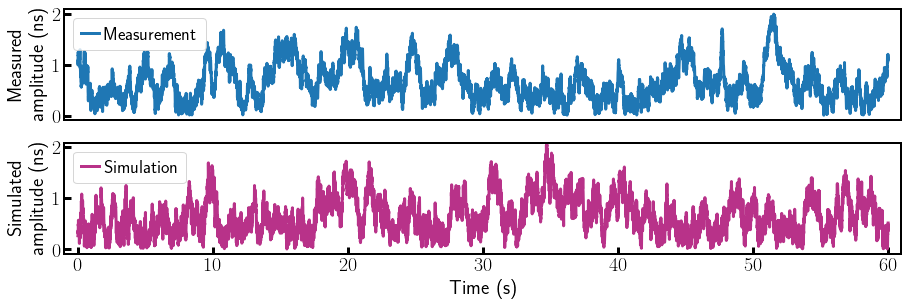

In [49]:
# plt.rcParams["text.usetex"] =True
# plt.rc('text.latex', preamble=\
#        r'\usepackage{siunitx}'
#       +r'\newcommand{\e}{\epsilon}')
# plt.rcParams.update({'figure.figsize':(30,8),
#                      'font.size': 22,
#                      'legend.fontsize':22,
#                      'errorbar.capsize':3})
from ursse.path_assistant import get_plot_style_sheet
plt.style.use(get_plot_style_sheet("jinst"))
fig, axs = plt.subplots(2, figsize=(15,4.5))
axs[0].plot(meas_fits_df['mid_time_sec'], meas_fits_df['Amplitude_ns'], label="Measurement")
axs[0].set_xticks([])
axs[1].plot(sim_fits_df['mid_time_sec'], sim_fits_df['Amplitude_ns'], color=purple, label="Simulation")
axs[1].set_ylim(axs[0].get_ylim())
axs[1].set_xlabel(r"Time (s)")
axs[0].set_ylabel("Measured\n amplitude (ns)")
axs[1].set_ylabel("Simulated\n amplitude (ns)")
for a in axs:
    a.set_yticks([0,1,2])
    a.set_xlim(-1,61)
    a.legend()
fig.savefig(os.path.join(images_dir,
                             "comparison_of_amplitude_vs_time.png"),
            dpi=300, bbox_inches='tight')
plt.show()

In [25]:
for df in [meas_fits_df, sim_fits_df]:
    print(np.sqrt(df['Amp2'].mean()/2))

0.5260762176108879
0.5234814296196173


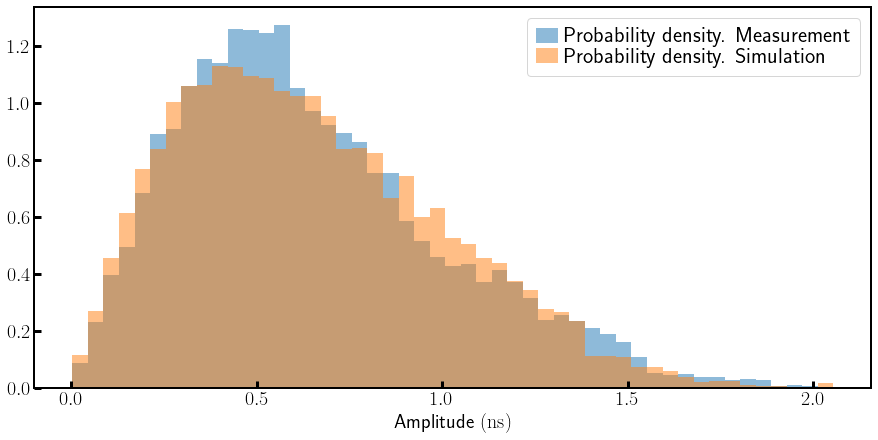

In [26]:
plt.rcParams["text.usetex"] =True
plt.rc('text.latex', preamble=\
       r'\usepackage{siunitx}'
      +r'\newcommand{\e}{\epsilon}')
plt.rcParams.update({'figure.figsize':(30,8),
                     'font.size': 22,
                     'legend.fontsize':22,
                     'errorbar.capsize':3})
nbins = 50
amps_tuple = [df['Amplitude_ns'].values for df in (meas_fits_df, sim_fits_df)]
all_amps = np.concatenate(amps_tuple)
l = np.min(all_amps)
r = np.max(all_amps)
bins = np.linspace(l, r, nbins)
bin_centers = (bins[1:]+bins[:-1])/2
kick_hists = [np.histogram(amps, bins=bins)[0] 
                  for amps in amps_tuple]
fig, ax = plt.subplots(figsize=(15,7))
ax.hist(bin_centers, weights=kick_hists[0], bins=bins, density=True,
            alpha=0.5, label="Probability density. Measurement")
ax.hist(bin_centers, weights=kick_hists[1], bins=bins, density=True,
            alpha=0.5, label="Probability density. Simulation")
ax.set_xlabel(r"Amplitude $(\SI{}{ns})$")
ax.legend()
plt.show()

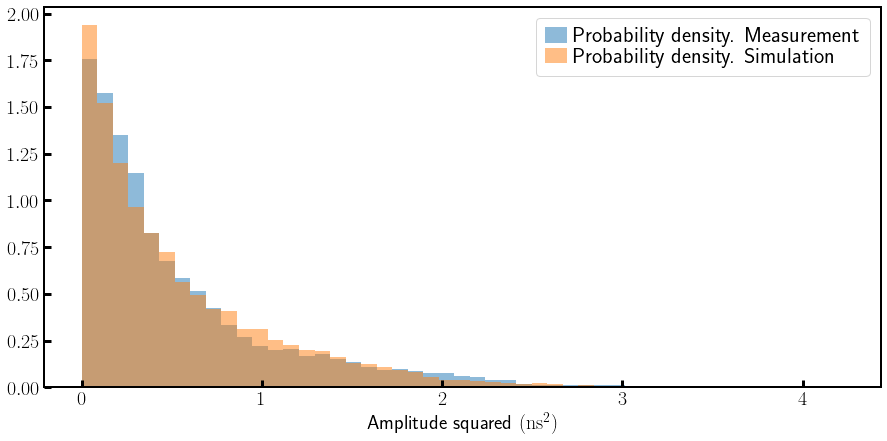

In [27]:
plt.rcParams["text.usetex"] =True
plt.rc('text.latex', preamble=\
       r'\usepackage{siunitx}'
      +r'\newcommand{\e}{\epsilon}')
plt.rcParams.update({'figure.figsize':(30,8),
                     'font.size': 22,
                     'legend.fontsize':22,
                     'errorbar.capsize':3})
nbins = 50
amps_tuple = [df['Amp2'].values for df in (meas_fits_df, sim_fits_df)]
all_amps = np.concatenate(amps_tuple)
l = np.min(all_amps)
r = np.max(all_amps)
bins = np.linspace(l, r, nbins)
bin_centers = (bins[1:]+bins[:-1])/2
kick_hists = [np.histogram(amps, bins=bins)[0] 
                  for amps in amps_tuple]
fig, ax = plt.subplots(figsize=(15,7))
ax.hist(bin_centers, weights=kick_hists[0], bins=bins, density=True,
            alpha=0.5, label="Probability density. Measurement")
ax.hist(bin_centers, weights=kick_hists[1], bins=bins, density=True,
            alpha=0.5, label="Probability density. Simulation")
ax.set_xlabel(r"Amplitude squared $(\SI{}{ns^2})$")
ax.legend()
plt.show()

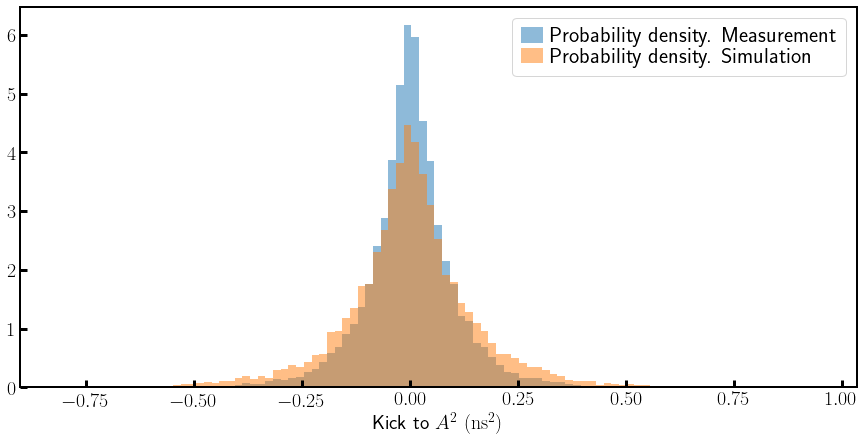

In [28]:
plt.rcParams["text.usetex"] =True
plt.rc('text.latex', preamble=\
       r'\usepackage{siunitx}'
      +r'\newcommand{\e}{\epsilon}')
plt.rcParams.update({'figure.figsize':(30,8),
                     'font.size': 22,
                     'legend.fontsize':22,
                     'errorbar.capsize':3})
nbins = 100
kicks_tuple = [df['Kicks'].values for df in (meas_fits_df, sim_fits_df)]
all_kicks = np.concatenate(kicks_tuple)
l = np.min(all_kicks)
r = np.max(all_kicks)
bins = np.linspace(l, r, nbins)
bin_centers = (bins[1:]+bins[:-1])/2
kick_hists = [np.histogram(kicks, bins=bins)[0] 
                  for kicks in kicks_tuple]
fig, ax = plt.subplots(figsize=(15,7))
ax.hist(bin_centers, weights=kick_hists[0], bins=bins, density=True,
            alpha=0.5, label="Probability density. Measurement")
ax.hist(bin_centers, weights=kick_hists[1], bins=bins, density=True,
            alpha=0.5, label="Probability density. Simulation")
ax.set_xlabel(r"Kick to $A^2$ $(\SI{}{ns^2})$")
ax.legend()
plt.show()

# Correlation between phase derivative and amplitude

In [29]:
dt = 0.025
meas_fits_df['time'] = dt * ((meas_fits_df['mid_time_sec']) // dt)
reduced_fits_df = meas_fits_df.groupby(meas_fits_df['time']).mean()
# reduced_fits_df = reduced_fits_df[reduced_fits_df.index >= 0]
# plt.plot(reduced_fits_df.index, reduced_fits_df['Amplitude_ns'])
# plt.xlim(0,1)
# reduced_fits_df

In [30]:
reduced_fits_df

,start_idx,end_idx,start_revolution,end_revolution,A,B,mid_time_sec,Amplitude_ns,Amp2,Kicks,time
time,,,,,,,,,,,
0.000,2.750000e+02,4.396000e+02,8.053820e+04,1.271978e+05,-1.075360,0.087945,0.010688,1.081837,1.178795,0.081321,0.000
0.025,9.728000e+02,1.126600e+03,2.806742e+05,3.275730e+05,-1.129221,0.151528,0.037407,1.139460,1.299801,-0.075529,0.025
0.050,1.616200e+03,1.756600e+03,4.812744e+05,5.279562e+05,-1.143615,0.150238,0.064127,1.155039,1.334969,0.055425,0.050
0.075,2.160250e+03,2.320250e+03,6.617335e+05,7.082745e+05,-1.139870,0.293621,0.088174,1.177507,1.387294,-0.011921,0.075
0.100,2.788600e+03,2.948800e+03,8.419100e+05,8.886618e+05,-1.074047,0.307245,0.112222,1.117978,1.254152,-0.040359,0.100
...,...,...,...,...,...,...,...,...,...,...,...
59.900,1.477553e+06,1.477704e+06,4.493473e+08,4.493937e+08,0.124924,-0.781006,59.912940,0.813831,0.665550,-0.070889,59.900
59.925,1.478143e+06,1.478298e+06,4.495275e+08,4.495742e+08,-0.533751,-0.703242,59.936988,0.896395,0.806115,0.067681,59.925
59.950,1.478788e+06,1.478934e+06,4.497282e+08,4.497743e+08,-0.949251,-0.431538,59.963707,1.043952,1.096070,0.044430,59.950


In [31]:
meas_phase_df['time'] = dt * (meas_phase_df['time_sec'] // dt)
meas_phase_df['idx'] = meas_phase_df.index
grouped_phase_df = meas_phase_df.groupby(meas_phase_df['time'])
period_df = grouped_phase_df.mean()
period_df['delta_t'] = grouped_phase_df['time_sec'].apply(lambda a: a.max()-a.min())
period_df['idx'] = grouped_phase_df['idx'].apply(lambda a: a.max()-a.min())
period_df['T'] = (lambda x: x['delta_t']/x['idx'])(period_df)
# plt.plot(period_df.index, period_df['T'])
# period_df

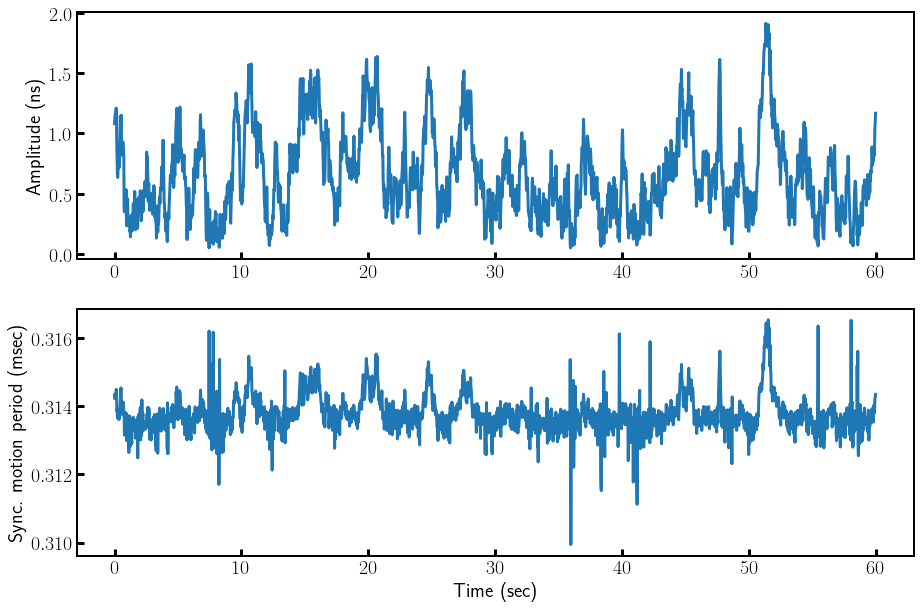

In [32]:
fig, axs = plt.subplots(2, figsize=(15,10))
ax1, ax2 = axs
ax1.plot(reduced_fits_df.index, reduced_fits_df['Amplitude_ns'])
ax1.set_ylabel("Amplitude (ns)")
ax2.plot(period_df.index, 1000*period_df['T'])
ax2.set_ylabel("Sync. motion period (msec)")
ax2.set_xlabel("Time (sec)")
fig.savefig(os.path.join(images_dir,
                             "comparison_of_amplitude_and_sync_period_vs_time.png"),
            dpi=300, bbox_inches='tight')
plt.show()

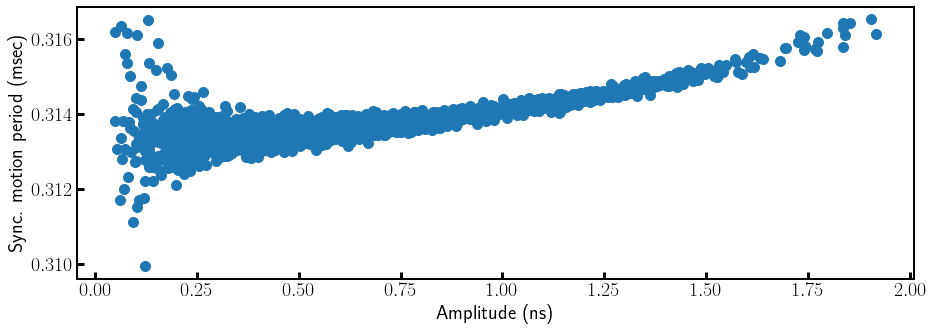

In [33]:
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(reduced_fits_df['Amplitude_ns'], 1000*period_df['T'])
ax.set_xlabel("Amplitude (ns)")
ax.set_ylabel("Sync. motion period (msec)")
# fig.savefig(os.path.join(images_dir,
#                              "correlation_of_amplitude_and_sync_period.png"),
#             dpi=300, bbox_inches='tight')
plt.show()

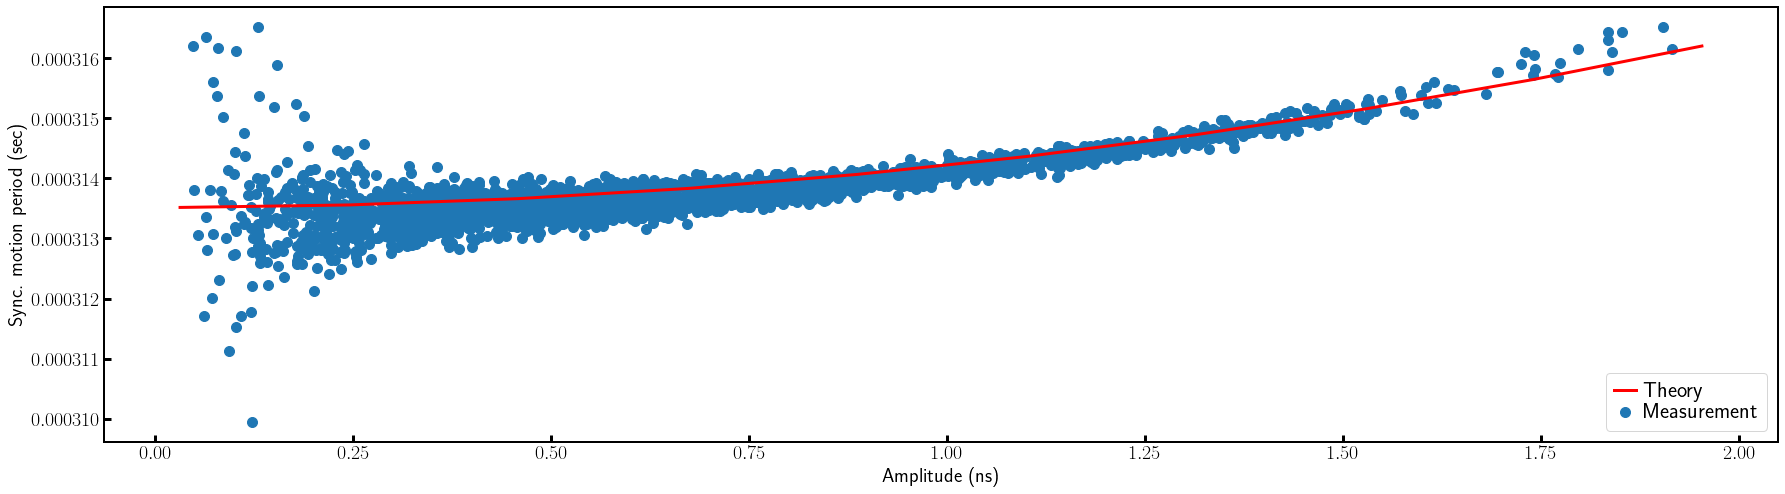

In [34]:
from scipy.optimize import fsolve
gamma = get_from_config("gamma")
alpha = 1.1*get_from_config("ring_alpha")
V = 0.905*get_from_config("Vrf")
f = 1/get_from_config("IOTA_revolution_period")
h = get_from_config("RF_q")
meMeV = get_from_config("me_MeV")
E0 = gamma*meMeV*1e6
eta = alpha - 1/gamma**2
v0 = V / E0
w = 2 * np.pi * h * eta
phi0 = np.arcsin(Et/V)
rad_to_ns = 1e9/2/np.pi/(h*f)

def U(phi):
    return v0/w*f**2*(1-np.cos(phi)-phi*np.sin(phi0))

def get_sync_period(kinet_en, nintegration=10000):
    kappa = kinet_en/(v0/w*f**2)
    apr1 = np.sin(phi0) - np.sqrt(np.sin(phi0)**2+2*kappa)
    apr2 = np.sin(phi0) + np.sqrt(np.sin(phi0)**2+2*kappa)
    func = lambda x: U(x[0])-kinet_en
    pars = dict(maxfev=1000)
    phi1, phi2 = fsolve(func, [apr1], **pars)[0], fsolve(func, [apr2], **pars)[0]
    step = (phi2-phi1)/nintegration
    epsilon = 0.1*step
    phis = np.linspace(phi1+epsilon, phi2-epsilon, nintegration)
    vals = 1/np.sqrt(2*(kinet_en-U(phis)))
    return [rad_to_ns*(phi2-phi1)/2, np.sum(step*vals)]

amps = np.linspace(0.2, 2.125, 10)/rad_to_ns


amps_pers = [get_sync_period(u) for u in U(amps)]
amps, pers = list(zip(*amps_pers))
fig, ax = plt.subplots()
ax.scatter(reduced_fits_df['Amplitude_ns'], period_df['T'], label="Measurement")
ax.set_xlabel("Amplitude (ns)")
ax.set_ylabel("Sync. motion period (sec)")
ax.plot(amps, pers, label="Theory", color='red', linewidth=3)
ax.legend()

# Exploration of Fourier Transform

In [50]:
0.025/0.3e-3

83.33333333333334